<a href="https://colab.research.google.com/github/lunaticsurfersyt/sagnik-013/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ** Me - Sagnik Datta **
## ** Here We are creating our first github project using ML Regression **

In [ ]:
#Here we are testing whether the files are present in the downloads folder or not
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#WE HAVE TO IMPORT THE DATASET FROM THE ALREADY SAVED FILES IN THE FILE SECTION
from google.colab import files
uploaded = files.upload()


Saving diabetes.csv to diabetes (1).csv


In [ ]:
#reading the dataset for the downloaded dataset for the diabetes prediction KNN
data_S = pd.read_csv('diabetes.csv')


In [ ]:
data_S.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


See here, 1 stands for TRUE outcome
whereas, 2 stands for FALSE Outcome

In [ ]:
#Using the following function, we can know the total no of patients that belong to each case
data_S.groupby("Outcome").size()

,0
Outcome,
0,500
1,268


In [ ]:
# SPLITTING THE DATASET
data_S.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Split the dataset into features and target variables or labels
#The variable X is showing errors
X=data_S.iloc[:,0:7].values
Y=data_S.iloc[:,8].values

In [ ]:
print(data_S.iloc[:,0:7].values[:,1])

[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 115. 126.  99. 196. 119. 143. 125. 147.  97.
 145. 117. 109. 158.  88.  92. 122. 103. 138. 102.  90. 111. 180. 133.
 106. 171. 159. 180. 146.  71. 103. 105. 103. 101.  88. 176. 150.  73.
 187. 100. 146. 105.  84. 133.  44. 141. 114.  99. 109. 109.  95. 146.
 100. 139. 126. 129.  79.   0.  62.  95. 131. 112. 113.  74.  83. 101.
 137. 110. 106. 100. 136. 107.  80. 123.  81. 134. 142. 144.  92.  71.
  93. 122. 163. 151. 125.  81.  85. 126.  96. 144.  83.  95. 171. 155.
  89.  76. 160. 146. 124.  78.  97.  99. 162. 111. 107. 132. 113.  88.
 120. 118. 117. 105. 173. 122. 170.  84.  96. 125. 100.  93. 129. 105.
 128. 106. 108. 108. 154. 102.  57. 106. 147.  90. 136. 114. 156. 153.
 188. 152.  99. 109.  88. 163. 151. 102. 114. 100. 131. 104. 148. 120.
 110. 111. 102. 134.  87.  79.  75. 179.  85. 129. 143. 130.  87. 119.
   0.  73. 141. 194. 181. 128. 109. 139. 111. 123. 159. 135.  85. 158.
 105. 

In [ ]:
#WE ARE USING THE COMMAND 'LABEL ENCODER'
X=data_S.iloc[:,0:7].values
Y=data_S.iloc[:,8].values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(Y)

In [ ]:
# SPLITTING DATASET into TRAIN SET AND TEST SET
X=data_S.iloc[:,0:7].values
Y=data_S.iloc[:,8].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:
#INPUT FEATURE MATRIX X(feature scaling of independent features)
X=data_S.iloc[:,0:7].values
Y=data_S.iloc[:,8].values
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train=sc.transform(X_train) # It will give the mean value of 0
X_test=sc.transform(X_test)   # and standard deviation of 1 after transformation


In [ ]:
#TRAINING AND PREDICTING FOR CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=7)

# Fitting the model into training data
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
print(y_pred) # It will give the predicted outcome

[0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 1 1 0
 0 0 0 1 1 0 0]


In [ ]:
# Evaluating the accuracy
acc = classifier.score(X_test,y_test)
print(acc)

0.703125


In [ ]:
#Finding the max value of K for maximising the F1-score
import sklearn
from sklearn.metrics import f1_score
f1s= []

# calculating the f1 score for K values between 1 and 40
for i in range(1,40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  pred_i = knn.predict(X_test)
#Using the class named"Average"= weighted to calcuate a weighted average of the 2 classes
  f1s.append(f1_score(y_test,pred_i, average = 'weighted'))
  print(f1s)
  count = len(f1s)
  print(count) # We have to print the count in order to obtain the graph



[0.5846018735362998]
1
[0.5846018735362998, 0.6179392610313662]
2
[0.5846018735362998, 0.6179392610313662, 0.6735885642135643]
3
[0.5846018735362998, 0.6179392610313662, 0.6735885642135643, 0.681699212949213]
4
[0.5846018735362998, 0.6179392610313662, 0.6735885642135643, 0.681699212949213, 0.7039521502119928]
5
[0.5846018735362998, 0.6179392610313662, 0.6735885642135643, 0.681699212949213, 0.7039521502119928, 0.6928676616176617]
6
[0.5846018735362998, 0.6179392610313662, 0.6735885642135643, 0.681699212949213, 0.7039521502119928, 0.6928676616176617, 0.6966215646925457]
7
[0.5846018735362998, 0.6179392610313662, 0.6735885642135643, 0.681699212949213, 0.7039521502119928, 0.6928676616176617, 0.6966215646925457, 0.6926466803911477]
8
[0.5846018735362998, 0.6179392610313662, 0.6735885642135643, 0.681699212949213, 0.7039521502119928, 0.6928676616176617, 0.6966215646925457, 0.6926466803911477, 0.7157061688311689]
9
[0.5846018735362998, 0.6179392610313662, 0.6735885642135643, 0.681699212949213,

Text(0, 0.5, 'F1-score')

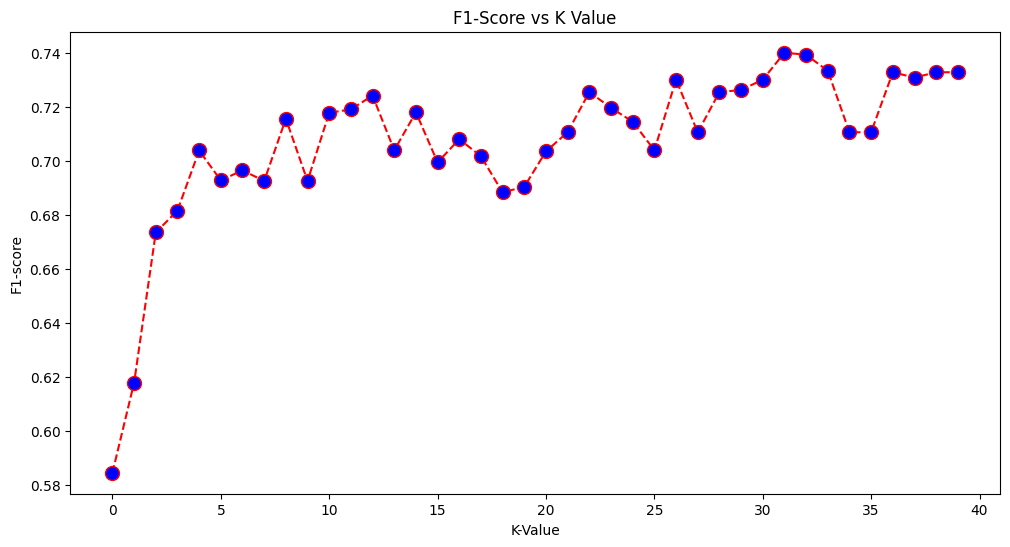

In [ ]:
import matplotlib.pyplot as plt
f1s.append(f1_score(y_test,pred_i, average = 'weighted'))
plt.figure(figsize=(12,6))
plt.plot(range(0,40),f1s,color='red',linestyle='dashed',marker='o',markerfacecolor='blue',markersize=10)
plt.title('F1-Score vs K Value')
plt.xlabel('K-Value')
plt.ylabel('F1-score')